## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load dataset

Load dataset dengan `pd.read_csv()`. Untuk homework, kita akan menggunakan data kebotakan yang sudah dimodifikasi sehingga berbeda dengan sesi hands-on.

In [5]:
# CODE HERE
df = pd.read_csv('misteri.csv')
df.head()

,A,B,C,D,E,F
0,52.694032,1.770970e+07,7.0,4.307956e+07,0.0,0.0
1,58.311613,1.649032e+07,0.0,4.179668e+07,0.0,0.0
2,50.306117,1.609868e+07,1.0,4.266504e+07,0.0,NaN
3,52.223764,1.862330e+07,0.0,2.406180e+07,0.0,0.0
4,52.017818,2.070175e+07,NaN,5.429762e+07,0.0,0.0


# EDA

## Descriptive Statistics
### Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [6]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13592 entries, 0 to 13591
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       13418 non-null  float64
 1   B       13415 non-null  float64
 2   C       13417 non-null  float64
 3   D       13405 non-null  float64
 4   E       13406 non-null  float64
 5   F       13429 non-null  float64
dtypes: float64(6)
memory usage: 637.2 KB


Apa yang dapat kita pahami?
* Dataframe memiliki total 13592 baris dan 6 kolom
* Terdapat missing value (NaN) untuk setiap variabel (kolom)
* Target klasifikasi sepertinya adalah kolom `F` dengan tipe data `float64`
* Berarti sisanya adalah *feature*

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [7]:
# CODE HERE
nums = ['A','B','C','D']
cats = ['E','F']

### Sampling untuk memahami data dengan `df.sample()`

Setelah mengetahui kolom apa saja yang ada di dalam dataset, kita lakukan sampling untuk memastikan apakah isi kolomnya sesuai ekspektasi. Biasakan lakukan ini beberapa kali karena seringkali apabila ada keanehan tidak akan keluar pada sampling pertama.

Sampling dapat dilakukan dengan menggunakan `df.sample()`

In [8]:
# CODE HERE
df.sample(10)

,A,B,C,D,E,F
13315,NaN,1.413919e+07,8.0,3.374738e+07,0.0,0.0
1506,42.943878,1.095555e+07,6.0,2.160977e+07,0.0,0.0
9466,53.091571,1.869500e+07,1.0,5.899871e+07,0.0,0.0
1548,52.912917,1.492003e+07,7.0,6.215144e+07,0.0,0.0
5016,39.417070,1.609289e+07,2.0,1.135491e+07,0.0,0.0
2017,49.124003,1.430422e+07,NaN,3.753676e+07,0.0,0.0
7439,58.757712,1.343963e+07,3.0,1.422170e+07,0.0,0.0
6615,50.191254,2.251640e+07,1.0,2.324704e+07,0.0,0.0
4231,59.423544,2.158175e+07,1.0,1.456687e+07,0.0,0.0
3778,58.892265,1.995600e+07,2.0,6.168577e+07,0.0,0.0


Beberapa pengamatan:
* Target kita, `F` benar bertipe float dengan *range* 0-1, dimana 1 melambangkan kemungkinan 100%
* Sudah benar dalam menentukan jenis kolom yang termasuk numerik dan kategorik

### Statistical summary dengan `df.describe()`
Selanjutnya kita munculkan ringkasan statistik dataframe, baik untuk numerical dan categorical. Hal ini dilakukan untuk mengecek secara singkat akan keberadaan outlier dan karakteristik distribusi untuk `feature` numeric.

In [9]:
# CODE HERE
df[nums].describe()

,A,B,C,D
count,13418.000000,1.341500e+04,13417.000000,1.340500e+04
mean,50.604303,1.646446e+07,2.537825,3.522170e+07
std,7.185786,3.385392e+06,2.830022,2.118154e+07
min,22.000000,7.540000e+06,0.000000,1.000000e+06
25%,45.710112,1.405912e+07,1.000000,2.049483e+07
50%,50.513100,1.612895e+07,2.000000,3.031256e+07
75%,55.457167,1.854458e+07,4.000000,4.465140e+07
max,80.000000,3.400000e+07,13.000000,2.340000e+08


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kolom `A` dan `B` terlihat normal (*mean* dan *median* cukup dekat, dan nilai Q2 kira2 tepat di tengah2 Q1 - Q3)
* Distribusi nilai di kolom `C` dan `D` adalah positive skew (*mean* > *median*)

Sekarang kita keluarkan *summary* kolom *categorical*

In [10]:
# CODE HERE
df[cats].describe()

,E,F
count,13406.000000,13429.000000
mean,0.151574,0.040882
std,0.358621,0.198023
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Nilai minimum pada kolom kategori `E` dan `F` yaitu 0, dan nilai maksimum adalah 1, melambangkan kategori yaitu kategori 0 dan kategori 1
* Terdapat missing value pada kolom `E` dan `F`

### Value Counting
Kita dapat memastikan pengamatan mengenai kolom-kolom *categorical* di atas dengan value counting

In [11]:
# CODE HERE
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom E:
0.0    11374
1.0     2032
Name: E, dtype: int64

Value count kolom F:
0.0    12880
1.0      549
Name: F, dtype: int64



Seperti yang bisa dilihat, pengamatan kita dari `df.describe()` tadi ternyata adalah BENAR karena:
* Sebaran nilai di kolom `E` dan `F` terlihat didominasi nilai tertentu
* Mayoritas data pada kolom `E` adalah kategori 0 dengan frekuensi 11374
* Mayoritas data pada kolom `F` adalah kategori 0 dengan frekuensi 12880

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

Kita tampilkan box plot untuk setiap kolom *numeric* kita:

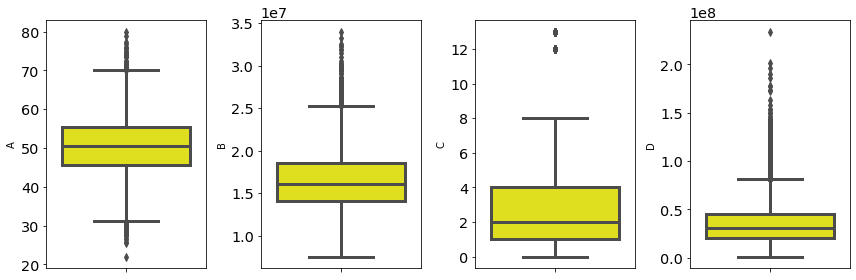

In [12]:
# CODE HERE
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(df[nums[i]], color='yellow', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier. Dari data di atas:
* Outlier terlihat utamanya pada kolom `A`, `B`, dan `D`
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `B`, dan `D`

### Dist plots

Kita tampilkan dist plot untuk setiap kolom *numeric* kita:

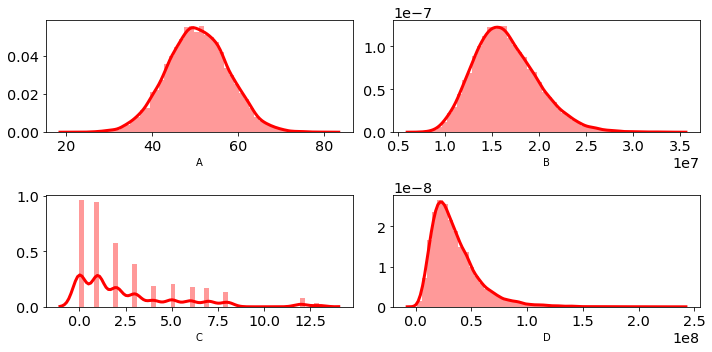

In [13]:
# CODE HERE
plt.figure(figsize=(10, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='red')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan awal ketika melihat boxplot di atas, kolom `B` dan `D` memiliki distribusi *positive skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat normal-normal saja

### Violin plots

Alternatif dari kedua plot di atas adalah Violin Plot.

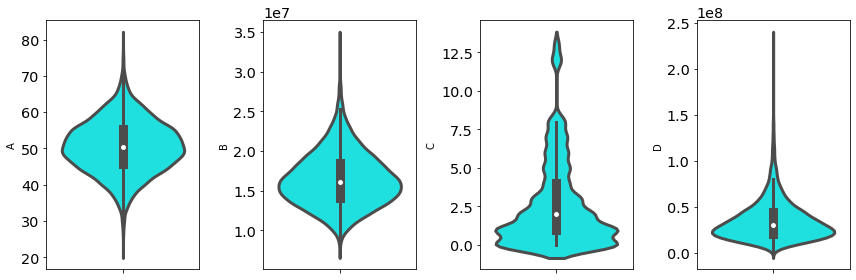

In [14]:
# CODE HERE
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(df[nums[i]], color='aqua', orient='v')
    plt.tight_layout()

Apakah violin plot menunjukkan hal yang sama dengan box/dist plot? YA

### Count plot (categorical)

Untuk data *categorical*, kita dapat menampilkan count plot.

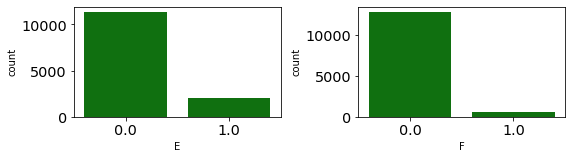

In [15]:
# CODE HERE
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='green', orient='v')
    plt.tight_layout()

Apa yang dapat kita simpulkan dari count plot?
* Sebaran nilai di kolom `E` dan `F` terlihat didominasi nilai tertentu
* Seperti pengamatan sebelumnya, pada kolom `E` dan `F` didominasi oleh kategori 0

## Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

Correlation heatmap dapat ditampilkan melalui fungsi `sns.heatmap()` dengan menggunakan data korelasi yang dihasilkan melalui `df.corr()`. 

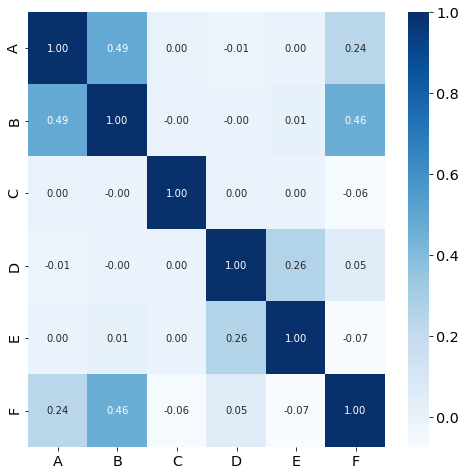

In [16]:
# CODE HERE
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `F` memiliki korelasi positif lemah dengan `A` dan `D`
* Ia juga memiliki korelasi positif sedang dengan `B` dan korelasi negatif lemah dengan `E` dan `C`
* `A` juga memiliki korelasi positif sedang dengan `B`. Ada kemungkinan kedua *feature* ini redundan

### Pair plot

Apabila angka pada correlation heatmap agak sulit untuk dicerna, kita dapat menampilkan *scatter plot* untuk semua kombinasi *feature numeric*. Hal ini dilakukan dengan menggunakan `sns.pairplot()`

C:\Users\Sesditjen PHIJSK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Sesditjen PHIJSK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

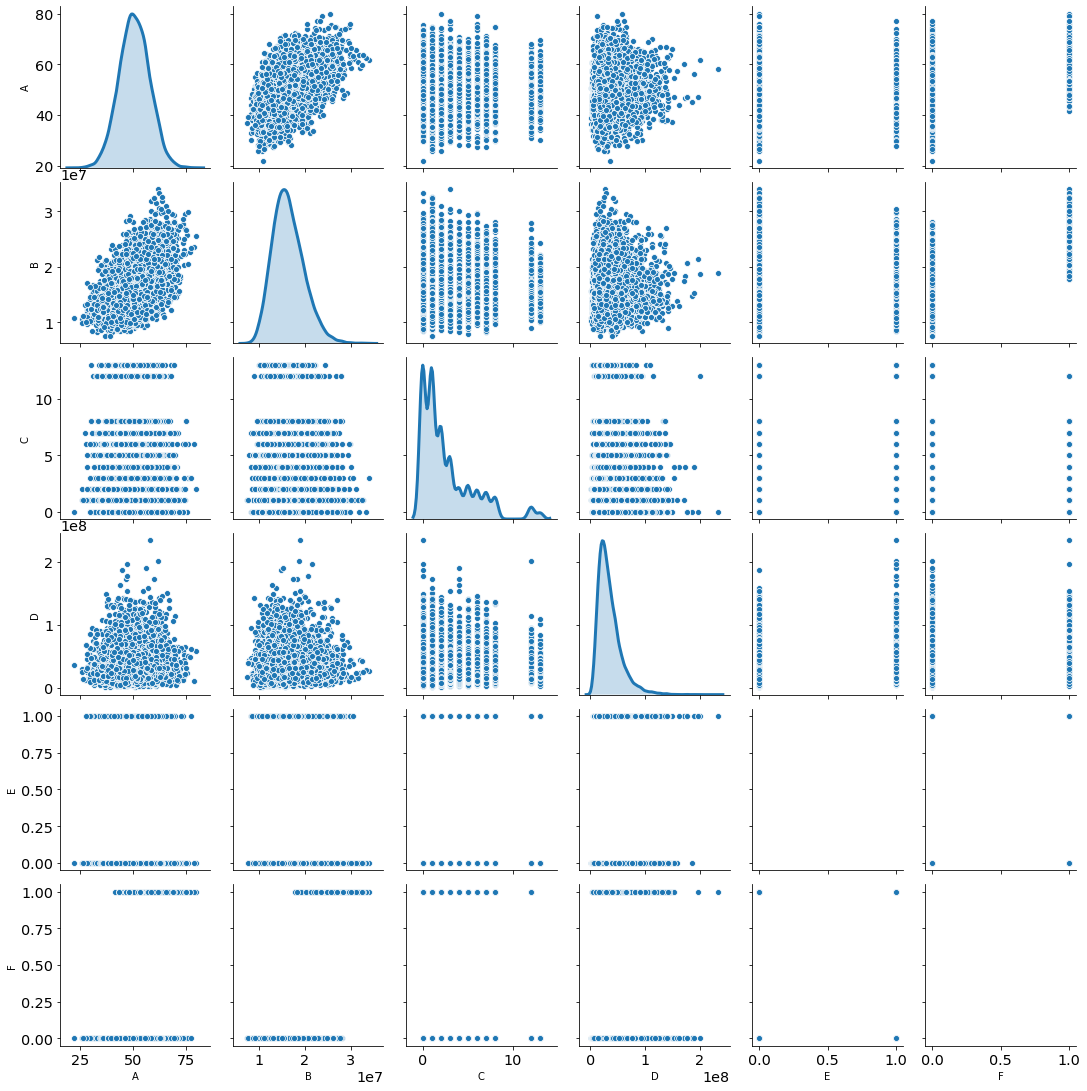

In [17]:
# CODE HERE
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde');

Dari pair plot di atas, kita dapat melihat:
* `F` cenderung lebih tinggi untuk kolom `E`
* `A` dan `B` sangat jelas memiliki korelasi linear

### Category plots

Terakhir kita tampilkan *category plot* untuk setiap pasangan kategori *numeric* dan *categorical* seperti di bawah ini

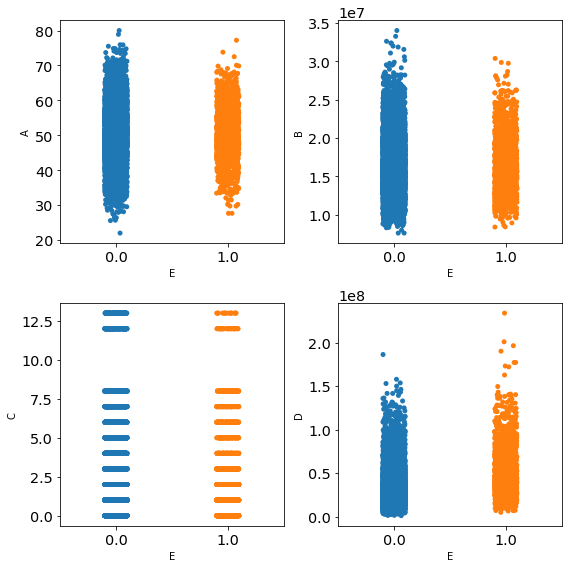

In [21]:
# CODE HERE
fig = plt.figure(figsize=(8, 8))
for i in range(0, len(nums)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.stripplot(ax=ax, data=df, x='E', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Dari semua *category plot* di atas, hal yang cukup penting untuk diingat adalah:
* Terlihat bahwa kolom kategori `E` berhubungan dengan `D`
* Serta kolom kategori `E` juga terdapat hubungan dengan kolom `B`

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan
* Namun masih ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan